# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

## Data Gathering

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
#Type your code here
df = pd.read_csv('netflix_clustering.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,type,release_year,country,rating,duration,title,listed_in,date_added,cluster
0,Movie,2020.0,United States,PG-13,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1
1,TV Show,2021.0,South Africa,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0
2,TV Show,2021.0,Unknown,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0
3,TV Show,2021.0,Unknown,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0
4,TV Show,2021.0,India,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0


## Data Asesing

In [ ]:
# cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8790 non-null   object 
 1   release_year  8790 non-null   float64
 2   country       8790 non-null   object 
 3   rating        8790 non-null   object 
 4   duration      8790 non-null   object 
 5   title         8790 non-null   object 
 6   listed_in     8790 non-null   object 
 7   date_added    8790 non-null   object 
 8   cluster       8790 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 618.2+ KB


In [ ]:
# cek misisng value
df.isna().sum()

type            0
release_year    0
country         0
rating          0
duration        0
title           0
listed_in       0
date_added      0
cluster         0
dtype: int64

In [ ]:
# cek duplikasi data
print("Data Duplikasi Ada: ", df.duplicated().sum())

Data Duplikasi Ada:  0


In [ ]:
# cek statistik data numerik
df.describe()

,release_year,cluster
count,8790.000000,8790.000000
mean,2016.366212,0.655404
std,3.633452,0.475263
min,2004.000000,0.000000
25%,2015.000000,0.000000
50%,2017.000000,1.000000
75%,2019.000000,1.000000
max,2021.000000,1.000000


## Data Encoding Decoding

In [28]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8790 non-null   object 
 1   release_year  8790 non-null   float64
 2   country       8790 non-null   object 
 3   rating        8790 non-null   object 
 4   duration      8790 non-null   object 
 5   title         8790 non-null   object 
 6   listed_in     8790 non-null   object 
 7   date_added    8790 non-null   object 
 8   cluster       8790 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 618.2+ KB


In [29]:
# Menggunakan Binary Encoding Untuk TV dan Movie
df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})
type_encoding = df.copy()
type_encoding.head()

,type,release_year,country,rating,duration,title,listed_in,date_added,cluster
0,0,2020.0,United States,PG-13,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1
1,1,2021.0,South Africa,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0
2,1,2021.0,Unknown,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0
3,1,2021.0,Unknown,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0
4,1,2021.0,India,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0


In [31]:
import category_encoders as ce

# Inisialisasi BinaryEncoder untuk kolom country
encoder = ce.BinaryEncoder(cols=['country'])

# Terapkan encoder hanya ke kolom 'country'
encoding = encoder.fit_transform(type_encoding[['country']])

# Drop kolom asli 'country'
type_encoding_no_country = type_encoding.drop(columns=['country'])

# Gabungkan hasil encoding ke dataframe asli (optional, buat modeling dll)
country_encoding = pd.concat([type_encoding_no_country, encoding], axis=1)

# Cek hasilnya
country_encoding.head()

,type,release_year,rating,duration,title,listed_in,date_added,cluster,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9
0,0,2020.0,PG-13,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1,0,0,0,0,0,0,0,0,0,1
1,1,2021.0,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0,0,0,0,0,0,0,0,0,1,0
2,1,2021.0,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1
3,1,2021.0,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1
4,1,2021.0,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Ordinal Encoding untuk 'rating'
rating_map = {
    'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'TV-MA': 4, 'Not Rated': 5,
    'TV-14': 6, 'TV-PG': 7, 'TV-Y': 8, 'TV-Y7': 9, 'TV-G': 10,
    'NC-17': 11, 'NR': 5, 'UR': 5, 'TV-Y7-FV': 9
}

country_encoding = country_encoding[~country_encoding['rating'].str.contains(r'\d+ min', na=False)]

country_encoding['rating'] = country_encoding['rating'].map(rating_map)
rating_encoding = country_encoding.copy()
rating_encoding.head()

,type,release_year,rating,duration,title,listed_in,date_added,cluster,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9
0,0,2020.0,2,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1,0,0,0,0,0,0,0,0,0,1
1,1,2021.0,4,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0,0,0,0,0,0,0,0,0,1,0
2,1,2021.0,4,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1
3,1,2021.0,4,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1
4,1,2021.0,4,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Ekstrak angka dari duration
rating_encoding['duration_numeric'] = rating_encoding['duration'].str.extract('(\d+)').astype(float)

# Hapus kolom asli duration, bukan duration_numeric
rating_encoding = rating_encoding.drop(columns=['duration'])

# Salin dataset setelah menghapus duration
durasi_encoding = rating_encoding.copy()

durasi_encoding.head()

,type,release_year,rating,title,listed_in,date_added,cluster,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,duration_numeric
0,0,2020.0,2,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1,0,0,0,0,0,0,0,0,0,1,90.0
1,1,2021.0,4,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0,0,0,0,0,0,0,0,0,1,0,2.0
2,1,2021.0,4,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1,1.0
3,1,2021.0,4,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0,0,0,0,0,0,0,0,0,1,1,1.0
4,1,2021.0,4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0,0,0,0,0,0,0,0,1,0,0,2.0


In [64]:
import category_encoders as ce

# Inisialisasi BinaryEncoder
encoder = ce.BinaryEncoder(cols=['listed_in'])

# Terapkan encoder ke kolom 'listed_in'
encoded_genre = encoder.fit_transform(durasi_encoding[['listed_in']])

# Gabungkan hasil encoding dengan kolom lain
genre_encoding = pd.concat([durasi_encoding.drop(columns=['listed_in']), encoded_genre], axis=1)

# Cek hasilnya
genre_encoding.head()

,type,release_year,rating,title,date_added,cluster,country_0,country_1,country_2,country_3,...,listed_in_0,listed_in_1,listed_in_2,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9
0,0,2020.0,2,Dick Johnson Is Dead,"September 25, 2021",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2021.0,4,Blood & Water,"September 24, 2021",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2021.0,4,Ganglands,"September 24, 2021",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,2021.0,4,Jailbirds New Orleans,"September 24, 2021",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2021.0,4,Kota Factory,"September 24, 2021",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [65]:
# Konversi ke datetime
genre_encoding['date_added'] = genre_encoding['date_added'].str.strip()
genre_encoding['date_added'] = pd.to_datetime(genre_encoding['date_added'], format='%B %d, %Y')
# pisahkan datetime
genre_encoding['year'] = genre_encoding['date_added'].dt.year
genre_encoding['month'] = genre_encoding['date_added'].dt.month
genre_encoding['day'] = genre_encoding['date_added'].dt.day
# Hapus kolom date_added
genre_encoding.drop(columns=['date_added'], inplace=True)
genre_encoding.head()

,type,release_year,rating,title,cluster,country_0,country_1,country_2,country_3,country_4,...,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,year,month,day
0,0,2020.0,2,Dick Johnson Is Dead,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2021,9,25
1,1,2021.0,4,Blood & Water,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2021,9,24
2,1,2021.0,4,Ganglands,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2021,9,24
3,1,2021.0,4,Jailbirds New Orleans,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2021,9,24
4,1,2021.0,4,Kota Factory,0,0,0,0,0,0,...,0,0,0,0,1,0,1,2021,9,24


In [66]:
# Hapus kolom title
data_clean = genre_encoding.drop(columns=['title'], errors='ignore')

## Exploratory Data Analisis (EDA)

In [124]:
# cek statistik data
data_clean.describe()

,type,release_year,rating,cluster,country_0,country_1,country_2,country_3,country_4,country_5,...,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,year,month,day
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,0.303072,0.727424,0.478214,0.655404,0.029010,0.042207,0.063140,0.134926,0.161320,0.229920,...,0.341183,0.419909,0.476906,0.515700,0.468146,0.440842,0.450284,2018.873606,6.655859,12.500000
std,0.459612,0.213732,0.227759,0.475263,0.167845,0.201073,0.243228,0.341664,0.367846,0.420805,...,0.474134,0.493572,0.499495,0.499782,0.499013,0.496516,0.497551,1.573568,3.436103,9.887635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,0.000000,0.647059,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,1.000000
50%,0.000000,0.764706,0.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,7.000000,13.000000
75%,1.000000,0.882353,0.625000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,10.000000,20.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,12.000000,31.000000


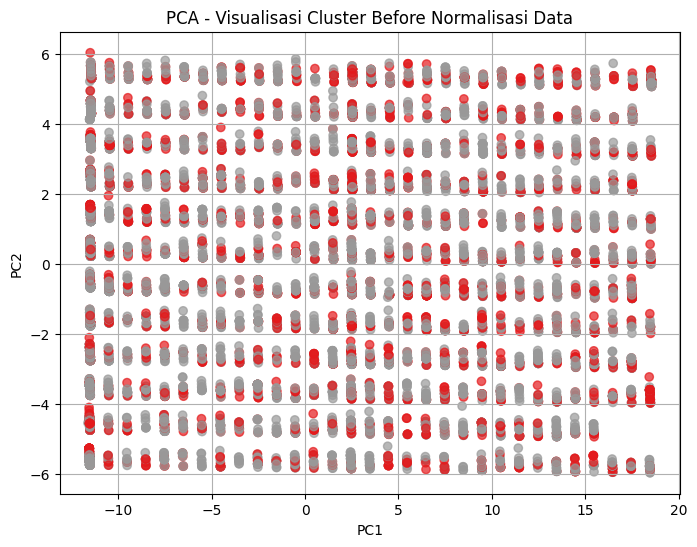

In [140]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pisahkan fitur numerik
X_numeric = data_clean.drop('cluster', axis=1).select_dtypes(include='number')

# Jalankan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

# 3. Visualisasi hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='Set1', alpha=0.7)
plt.title('PCA - Visualisasi Cluster Before Normalisasi Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


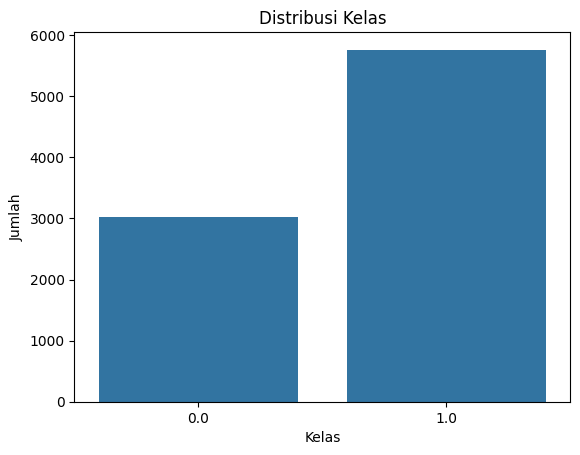

In [126]:
# visualisasi Disribusi kelas Label 
sns.countplot(x='cluster', data=data_clean)
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

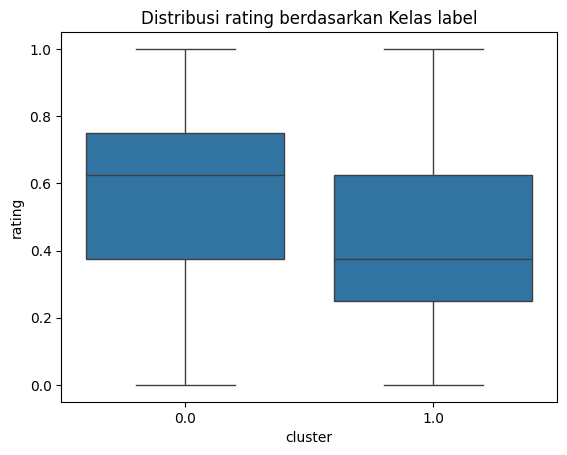

In [128]:
# Contoh: hubungan fitur 'age' dengan target 'churn'
sns.boxplot(x='cluster', y='rating', data=data_clean)
plt.title('Distribusi rating berdasarkan Kelas label')
plt.show()

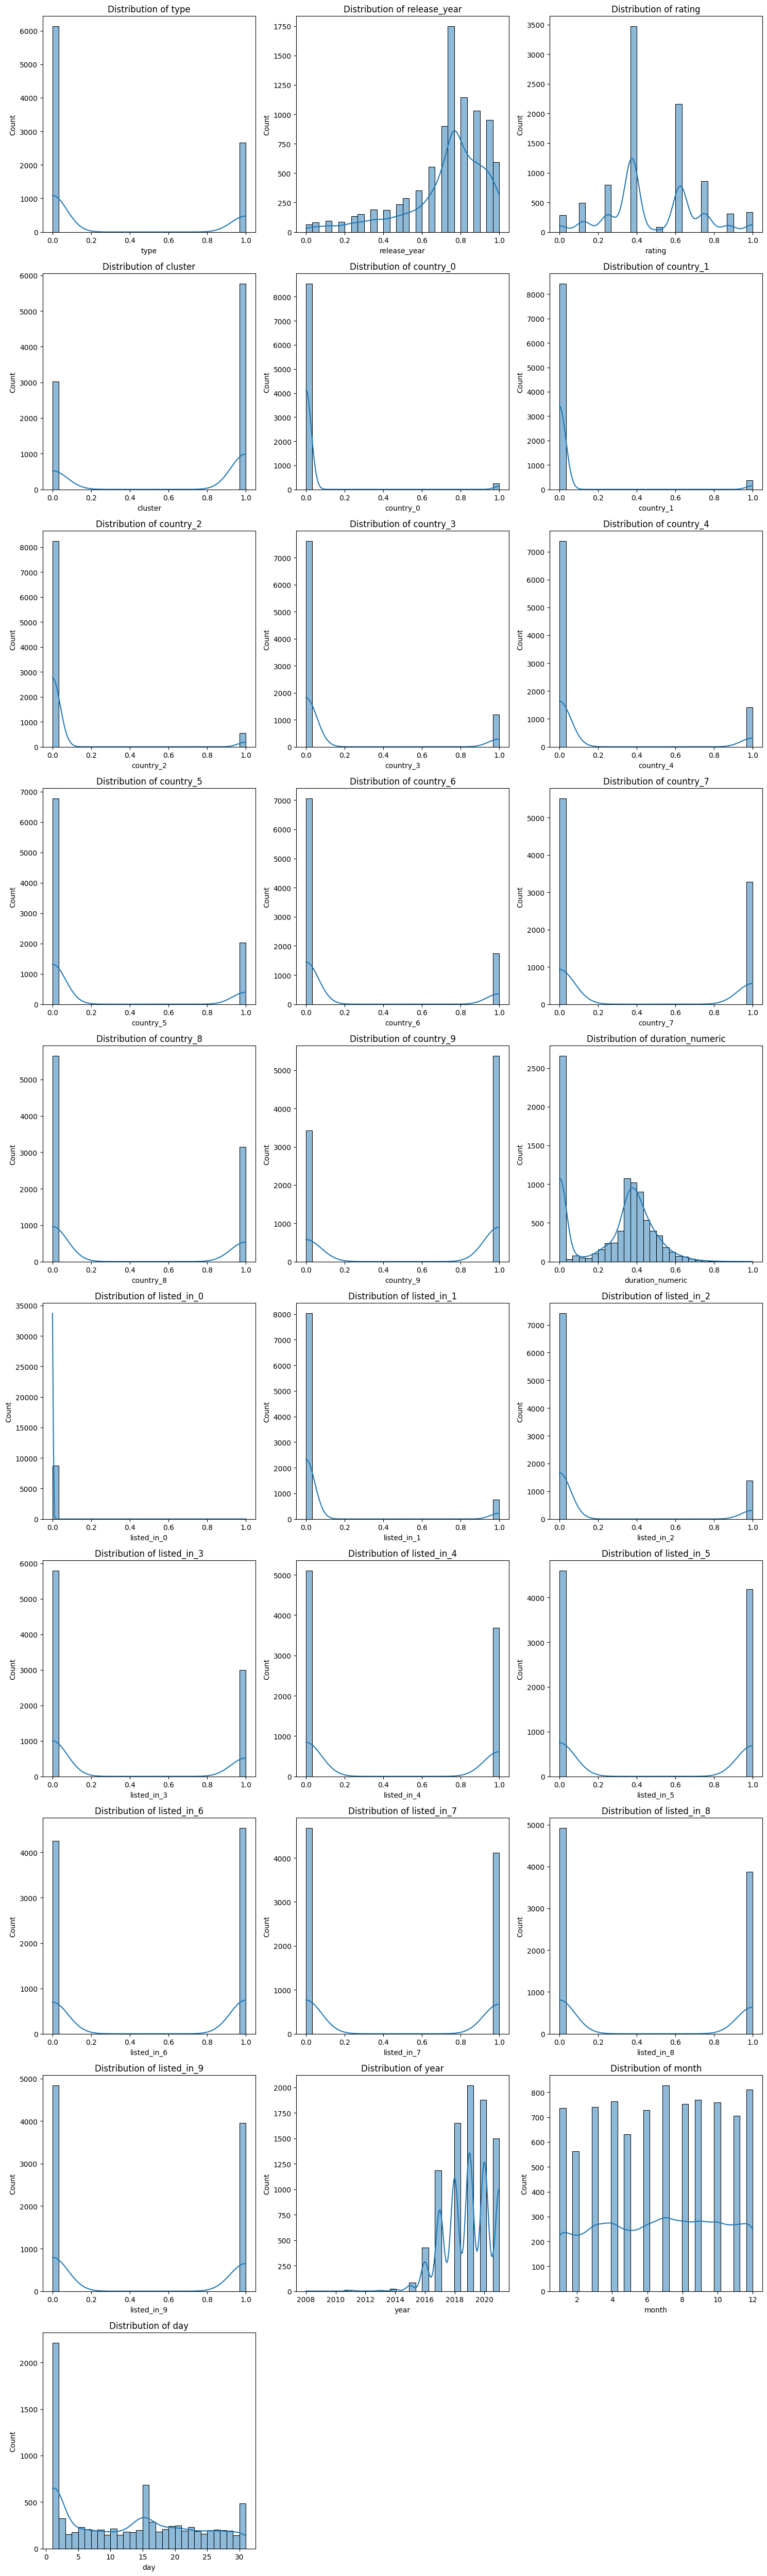

In [132]:
# visualisasikan distribusi data fitur yang diplih

# Hitung jumlah baris yang diperlukan untuk subplot
num_cols = len(data_clean)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))  # Sesuaikan tinggi figure

for i, column in enumerate(data_clean, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data_clean[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

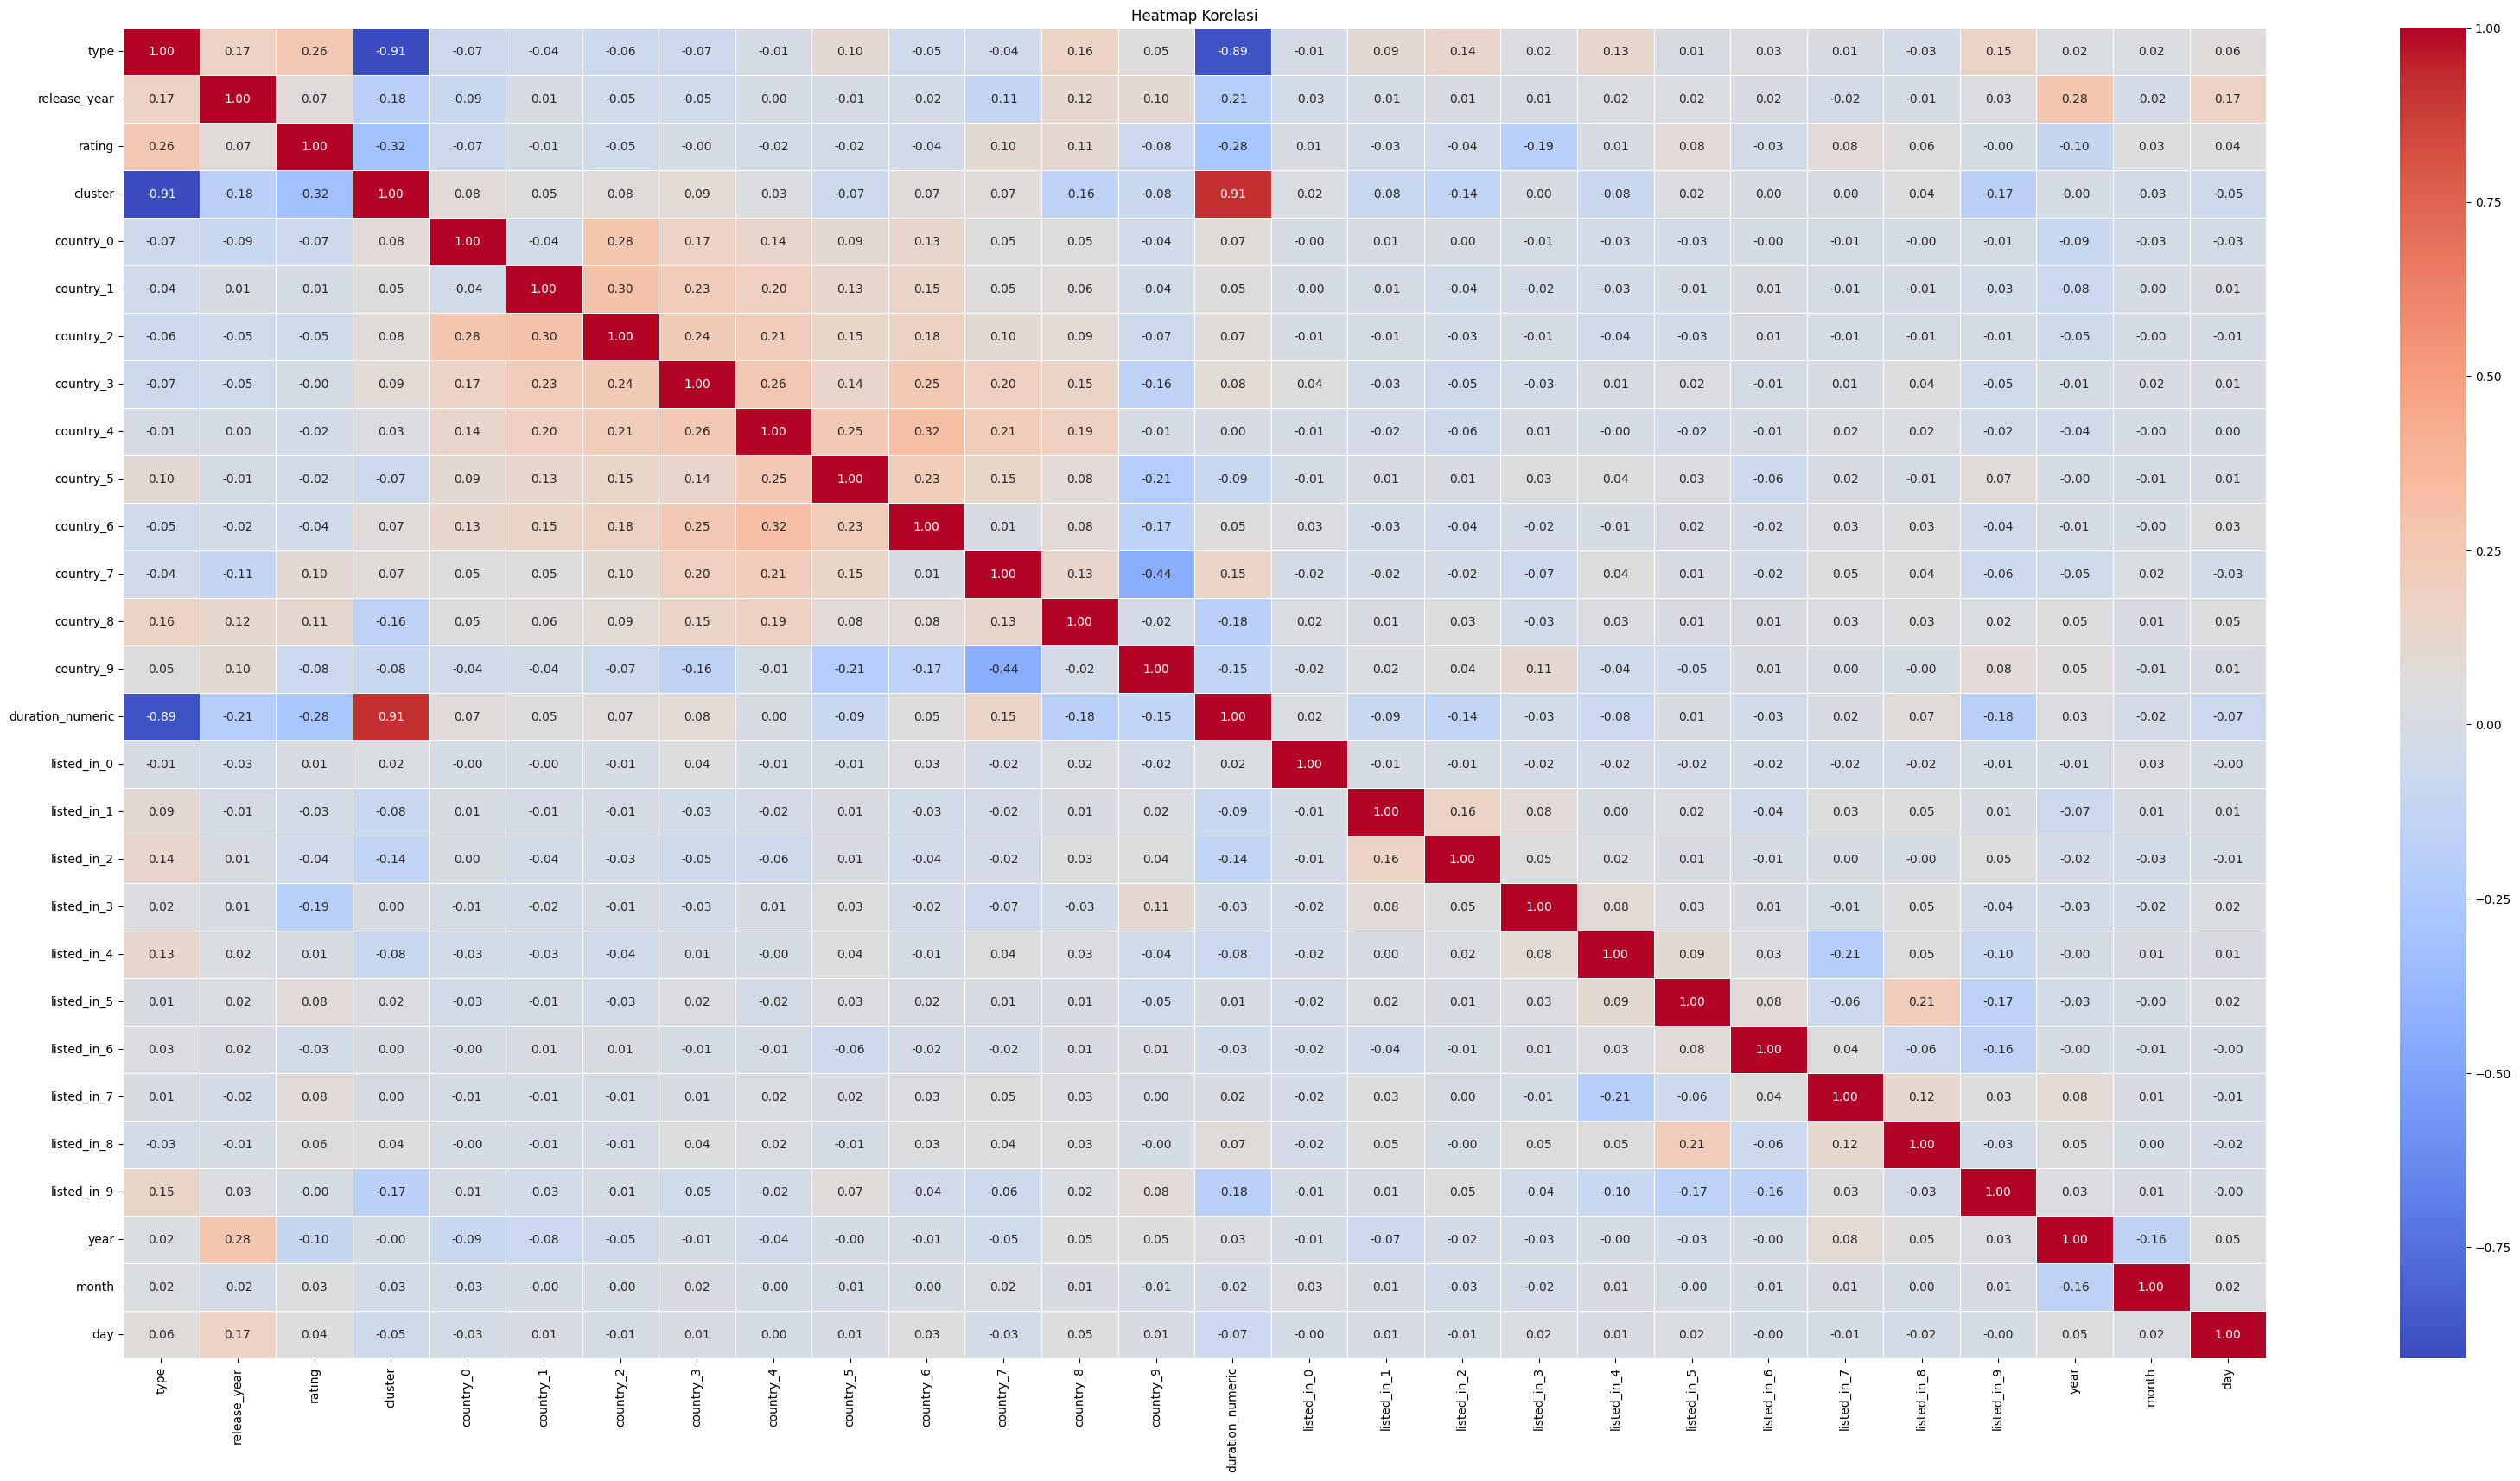

In [133]:
# plot matrik korelasi
num_features = data_clean.select_dtypes(include=[np.number])
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(40, 20))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## Cek Outlier

In [ ]:
# Cek Outlier
from scipy.stats import zscore

z_scores = np.abs(zscore(data_clean.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)

print("Jumlah outlier per fitur:")
print(outliers)

Jumlah outlier per fitur:
[  0 144   0   0 255 371 555   0   0   0   0   0   0   0   7   4 763   0
   0   0   0   0   0   0   0  56   0   0]


In [ ]:
# Tnganai Outlier

# Hitung IQR
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Gantilah outlier dengan median masing-masing kolom
median_values = data_clean.median()

data_filter = data_clean.copy()
for col in data_clean.columns:
    data_filter[col] = data_clean[col].mask(
        (data_clean[col] < lower_bound[col]) | (data_clean[col] > upper_bound[col]),
        median_values[col]
    )

# **Gabungkan kembali dengan kolom non-numerik**
data_non_numeric = data_clean.select_dtypes(exclude=['number'])  # Ambil kolom non-numerik
data_filter = pd.concat([data_filter, data_non_numeric], axis=1)  # Gabungkan

In [ ]:
# Cek Hasil pembersihan outlier
from scipy.stats import zscore

z_scores = np.abs(zscore(data_filter.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)

print("Jumlah outlier per fitur:")
print(outliers)

Jumlah outlier per fitur:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Normalisasi Data

In [111]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              8790 non-null   float64
 1   release_year      8790 non-null   float64
 2   rating            8790 non-null   float64
 3   cluster           8790 non-null   float64
 4   country_0         8790 non-null   float64
 5   country_1         8790 non-null   float64
 6   country_2         8790 non-null   float64
 7   country_3         8790 non-null   float64
 8   country_4         8790 non-null   float64
 9   country_5         8790 non-null   float64
 10  country_6         8790 non-null   float64
 11  country_7         8790 non-null   float64
 12  country_8         8790 non-null   float64
 13  country_9         8790 non-null   float64
 14  duration_numeric  8790 non-null   float64
 15  listed_in_0       8790 non-null   float64
 16  listed_in_1       8790 non-null   float64


In [112]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data_filter.select_dtypes(include=['int64', 'float64']).columns
data_filter[numeric_columns] = scaler.fit_transform(data_filter[numeric_columns])
data_filter.describe()

,type,release_year,rating,cluster,country_0,country_1,country_2,country_3,country_4,country_5,...,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,year,month,day
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.0,8790.0,8790.0,8790.0,8790.0,8790.0,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,0.303072,0.642445,0.478214,0.655404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.341183,0.419909,0.476906,0.515700,0.468146,0.440842,0.450284,2018.914790,6.655859,12.500000
std,0.459612,0.229696,0.227759,0.475263,0.0,0.0,0.0,0.0,0.0,0.0,...,0.474134,0.493572,0.499495,0.499782,0.499013,0.496516,0.497551,1.483446,3.436103,9.887635
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,0.000000,0.545455,0.375000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,1.000000
50%,0.000000,0.636364,0.375000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,7.000000,13.000000
75%,1.000000,0.818182,0.625000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,10.000000,20.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,12.000000,31.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [113]:
# X = fitur, y = label hasil clustering
X = data_filter.drop(columns=['cluster'])
y = data_filter['cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(7032, 27), y_train=(7032,)
Test set shape: X_test=(1758, 27), y_test=(1758,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

### SVC

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Model
model = SVC()

# Hyperparameter Tuning grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid Search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Hasil tuning
print("Best Parameters:", grid.best_params_)
print("Best Score on Training (CV):", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score on Training (CV): 0.9719853283875279


In [115]:
# Model terbaik otomatis dilatih ulang pada seluruh data latih
best_model = grid.best_estimator_

# Evaluasi di data uji
y_pred = best_model.predict(X_test)

# Cek akurasi
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')  # bisa juga 'macro' atau 'micro'
print("F1 Score:", f1)

F1 Score: 0.9707106981438379


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Model dasar
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Hyperparameter Tuning grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Hasil
print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 1.0


In [119]:
from sklearn.metrics import f1_score

# Prediksi dengan data uji
y_pred = grid_rf.predict(X_test)

# Evaluasi
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 1.0


## **b. Evaluasi Model Klasifikasi**

### Evaluasi SVC

Accuracy: 0.9709897610921502
F1 Score: 0.9707106981438379
Precision: 0.9718815384099119
Recall: 0.9709897610921502


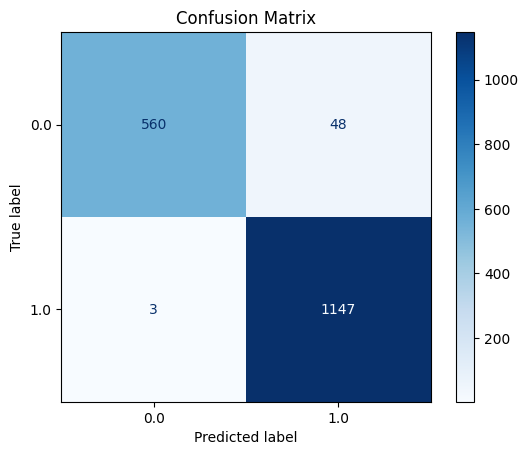

In [116]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # bisa juga 'macro' atau 'micro'
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan visualisasinya
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

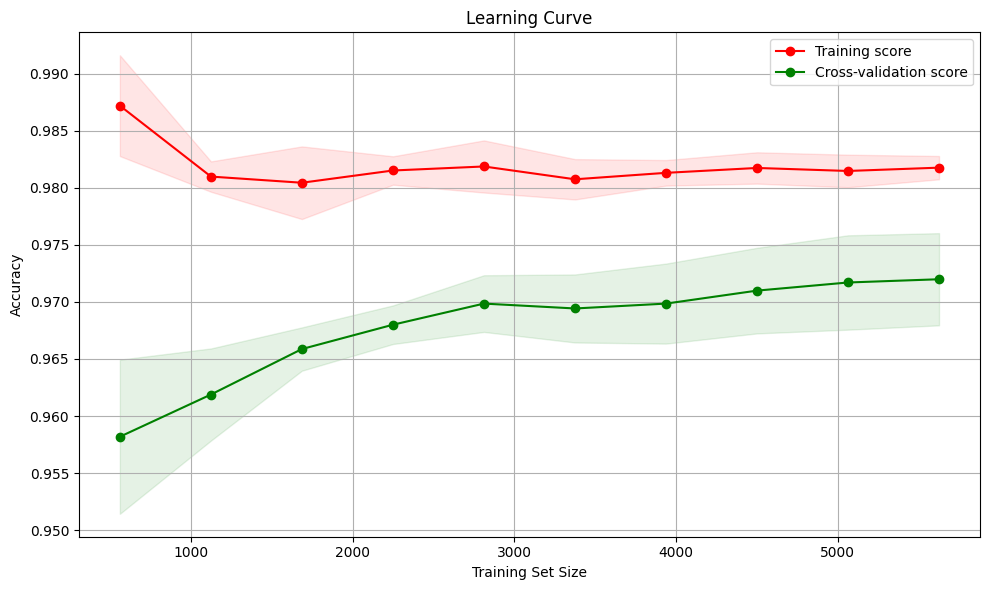

In [117]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Model terbaik hasil GridSearch
best_model = grid.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


### Evaluasi Random Forest

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


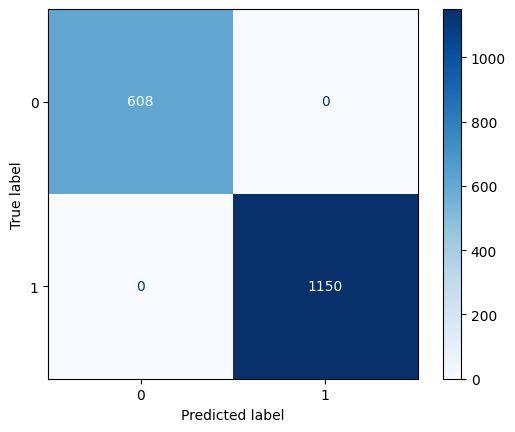

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Prediksi
y_pred = grid_rf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

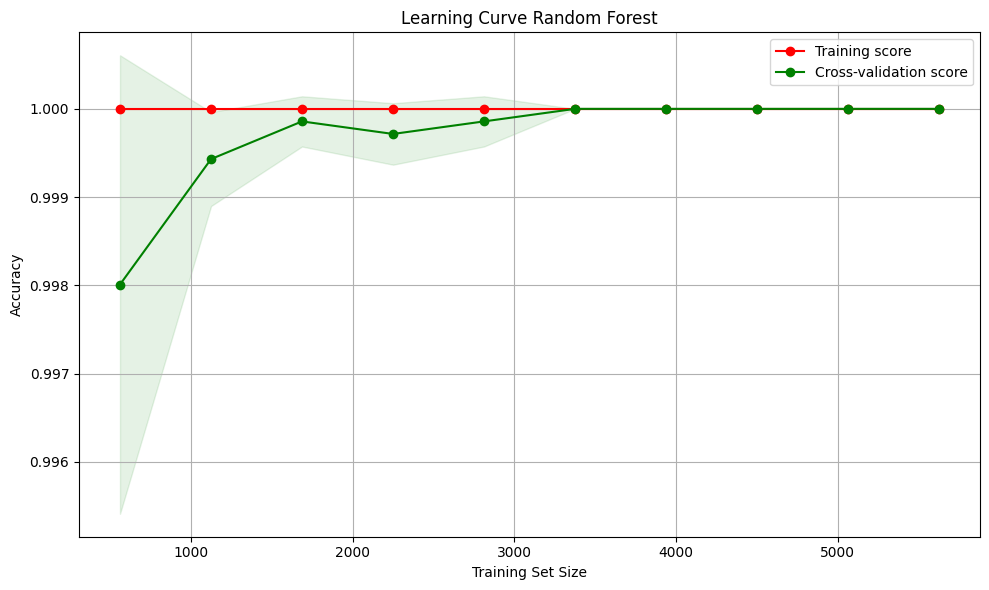

In [121]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Model terbaik hasil GridSearch
best_model = grid_rf.best_estimator_

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

## Analisa Hasil Evaluasi Model SVC

#### A. Identifikasi Kelemahan dan Evaluasi Performa
Metrik Evaluasi
- Accuracy: 0.971
- F1 Score: 0.971
- Precision: 0.972
- Recall: 0.971

Insight:
Kelas 0 memiliki 48 false positives, artinya model cukup sering salah memprediksi kelas 0 sebagai 1. Namun sebaliknya, hanya 3 false negatives untuk kelas 1 — model sangat bagus dalam mengenali kelas 1. Secara umum, performa model ini sangat tinggi dan cukup seimbang, terutama dalam mengenali kelas mayoritas (kelas 1).

#### B. Cek Overfitting / Underfitting
- Berdasarkan learning curve, Training Score konsisten tinggi di sekitar 0.981–0.986.
- Cross-validation Score meningkat stabil seiring bertambahnya data, dari 0.958 ke 0.973.
- Gap antara training dan validation score mulai kecil dan stabil, menunjukkan tidak terjadi overfitting signifikan.

Insight:
- Model tidak overfitting.
- Underfitting juga tidak terjadi karena training dan validation score cukup tinggi dan stabil.
- Model tampaknya sudah belajar dengan baik, meskipun masih ada sedikit gap → bisa sedikit ditingkatkan lagi dengan fine-tuning atau data augmentation.

#### Rekomendasi
- Tambahkan data untuk kelas 0 (karena sedikit lebih banyak false positives).
- Bisa coba penyesuaian threshold jika misalnya kelas 0 itu sangat penting (high cost error).
- Alternatif: bandingkan dengan model lain (misalnya Random Forest, XGBoost, atau Neural Network) jika kamu ingin melihat apakah ada yang bisa perform lebih tinggi.

## Analisa Hasil Evaluasi Model Random Forest

#### A. Identifikasi Kelemahan dan Evaluasi Performa
Metrik Evaluasi:
- Accuracy: 1.000
- F1 Score: 1.000
- Precision: 1.000
- Recall: 1.000

Insight:
Model menunjukkan performa sempurna di seluruh metrik evaluasi. Berdasarkan confusion matrix, tidak ada kesalahan prediksi:
- True Positive: 1150
- True Negative: 608
- False Positive: 0
- False Negative: 0

Insight: model mampu mengklasifikasikan kedua kelas secara sempurna. Ini menunjukkan bahwa model sangat kuat dalam mengenali pola dari data dan tidak menunjukkan kelemahan signifikan pada kelas manapun.

#### B. Cek Overfitting / Underfitting
- Berdasarkan learning curve, training score konsisten di angka 1.000.
- Cross-validation score juga mendekati 1.000 dan menyatu dengan training score saat data >3500.
- Variasi (standard deviation) dari cross-validation score mengecil seiring bertambahnya data pelatihan.

Insight:
- Tidak terjadi overfitting: karena validation score sangat tinggi dan menyatu dengan training score. 
- Tidak ada underfitting: model sudah belajar pola data dengan sangat baik sejak awal.
- Model sangat stabil dan akurat, dengan generalisasi yang sangat baik terhadap data baru.

#### C. Rekomendasi
Saat ini tidak ada kebutuhan mendesak untuk tuning atau mengganti model, tapi:
Jika performa terlalu sempurna secara tidak realistis, pastikan tidak ada data leakage.
Bandingkan dengan model lain (misal: XGBoost, LightGBM, atau Neural Network) hanya untuk benchmarking atau interpretabilitas.

## Analisa SVC Vs Random Forest

Model Random Forest memberikan performa lebih baik dibanding SVC, dengan hasil prediksi sempurna (Accuracy, F1, Precision, Recall = 1.0) tanpa tanda overfitting dan underfiting. Sementara SVC sudah sangat baik, namun masih terdapat sedikit kesalahan klasifikasi. Jadi, Random Forest lebih unggul secara akurasi dan stabilitas.